In [22]:
import torch
import torch.nn as nn

In [23]:
class DemoModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        a = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
        )
        
        b = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )
        
        c = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        
        d = nn.Sequential(
            nn.Conv2d(64, 1, kernel_size = 9)
        )
        
        self.model = nn.Sequential(a, b, c, d)
    
    def forward(self, x):
        return self.model(x)

In [38]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [32]:
model = DemoModel()

In [33]:
from profiler import Profiler

In [34]:
profiler = Profiler(model)

In [35]:
batch = torch.randn((32, 3, 128, 128))
for _ in range(5):
    profiler.forward(batch)

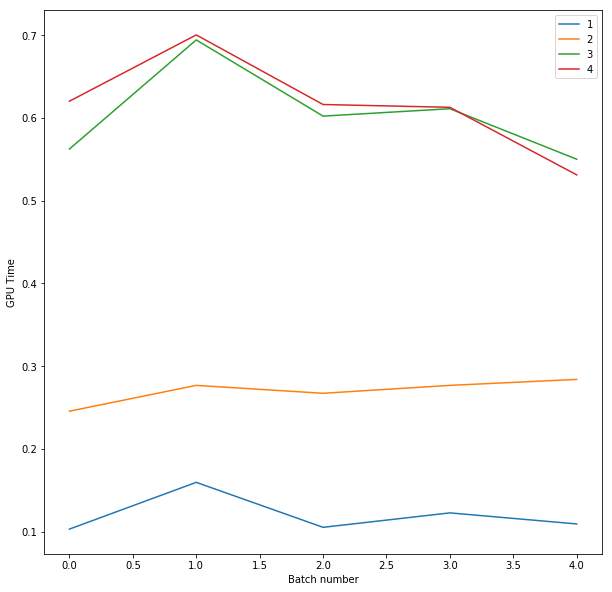

In [36]:
profiler.plot_results()

In [37]:
results = profiler.get_results()
results

defaultdict(list,
            {1: [0.1031179428100586,
              0.159592866897583,
              0.10525250434875488,
              0.12270069122314453,
              0.10934925079345703],
             2: [0.24559378623962402,
              0.2767660617828369,
              0.26721978187561035,
              0.27677297592163086,
              0.2839694023132324],
             3: [0.5623683929443359,
              0.6942014694213867,
              0.6021239757537842,
              0.611067533493042,
              0.5500564575195312],
             4: [0.6201560497283936,
              0.7002506256103516,
              0.6161437034606934,
              0.6127665042877197,
              0.5311241149902344]})